# Take a look in the Data


Here it’s the link for retrieving the Cluster and the BCG catalog


----------------------------------------------

Data from SDSS + SPIDERS

----------------------------------------------

HOW DATA WAS CONSTRUCTED:

	1. Cluster data (from catCluster-SPIDERS_RASS_CLUS-v3.0.fits) is joined
	with BCG data (from SpidersXclusterBCGs-v2.0.fits). Some clusters are
	dropped out because no BCG data.

	2. Use astroquery to query SDSS galaxies within 2*R200c of each cluster. R200c
	estimated from Lx assuming an X-ray Luminosity --- halo mass relation.


HOW TO READ THIS DATA:

	The HDF5 files were written using the pandas python package.
	You can quickly load them and turn them into 2D numpy arrays
	using the following commands:

	*****

	import pandas as pd
	import numpy as np

	Galaxy_data  = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Galaxies').to_numpy()
	Cluster_data = pd.read_hdf('Data/SPIDERS_Dataset.hdf5', key = 'Clusters').to_numpy()


	*****

	Each of 'Galaxy_data' and 'Cluster_data' will be a 2D numpy array 
	that you can index into using slicing.

	If you leave them as pandas dataframes you can also quickly access
	an individual column and turn it into a numpy array via:

	******

	Pandas_Series = Galaxy_data  [quantity_name]
	Numpy_array   = Galaxy_data  [quantity_name].values

	
	******


NOTES:
	1. 

---------------------------------------

Cluster Catalog properties

---------------------------------------

CLUZSPEC: Spectroscopic redshift of cluster BCG


---------------------------------------

Galaxy catalog properties
---------------------------------------

CLUS_ID: The SPIDERS ID of the cluster. Can use this to join Cluster Catalog properties
	 with the Galaxy Catalog.
     
v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

Galaxy_data  = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Galaxies')#.to_numpy()
Cluster_data = pd.read_hdf('../data/SPIDERS_Dataset.hdf5', key = 'Clusters')#.to_numpy()


For the description of the cluster columns take a look at: <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/catCluster-SPIDERS_RASS_CLUS.html <br>
https://data.sdss.org/datamodel/files/SPIDERS_ANALYSIS/SpidersXclusterBCGs.html


In [3]:
list(Cluster_data.columns)

['CLUS_ID',
 'NCOMPONENT',
 'CODEX',
 'RA',
 'DEC',
 'RA_OPT',
 'DEC_OPT',
 'LAMBDA_CHISQ_OPT',
 'Z_LAMBDA',
 'Z_LAMBDA_ERR',
 'NMEM',
 'NOKZ',
 'SCREEN_CLUZSPEC',
 'SCREEN_CLUZSPEC_ERR',
 'SCREEN_CLUZSPEC_SPREAD',
 'SCREEN_CLUVDISP_GAP',
 'SCREEN_CLUVDISP_BWT',
 'SCREEN_CLUVDISP_BEST',
 'SCREEN_NMEMBERS_W',
 'STATUS',
 'NINSPECTORS',
 'NVALID',
 'LX0124',
 'ELX',
 'R200C_DEG',
 'FLUX052',
 'EFLUX052',
 'MCXC',
 'ANAME',
 'CLUZSPEC',
 'RA_BCG',
 'DEC_BCG',
 'Mass_med',
 'SFR_MEDIAN',
 'flag_SFR_MPA_JHU',
 'GAL_sdss_g_modS_CHI2NU',
 'GAL_sdss_g_modS_C1_MAG',
 'GAL_sdss_g_modS_C1_RE',
 'GAL_sdss_g_modS_C1_N',
 'GAL_sdss_g_modS_C1_AR',
 'GAL_sdss_g_modS_C1_PA',
 'GAL_sdss_g_modS_C1_MAG_ERR',
 'GAL_sdss_g_modS_C1_RE_ERR',
 'GAL_sdss_g_modS_C1_N_ERR',
 'GAL_sdss_g_modS_C1_AR_ERR',
 'GAL_sdss_g_modS_C1_PA_ERR',
 'GAL_sdss_r_modS_CHI2NU',
 'GAL_sdss_r_modS_C1_MAG',
 'GAL_sdss_r_modS_C1_RE',
 'GAL_sdss_r_modS_C1_N',
 'GAL_sdss_r_modS_C1_AR',
 'GAL_sdss_r_modS_C1_PA',
 'GAL_sdss_r_modS_C1_MAG_E

<AxesSubplot:>

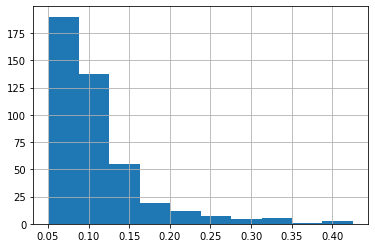

In [4]:
Cluster_data.R200C_DEG.hist()

In [5]:
Cluster_data.GAL_sdss_g_modS_C1_N

0       1.7510
1      19.9998
2       1.5593
3       6.2129
4       7.4678
        ...   
428     5.2535
429     5.6929
430     6.9246
431     4.4470
432     2.2155
Name: GAL_sdss_g_modS_C1_N, Length: 433, dtype: float32

In [6]:
list(Galaxy_data.columns)

['ra',
 'dec',
 'specobjid',
 'CLUS_ID',
 'z',
 'zErr',
 'zWarning',
 'v_los',
 'cModelMag_r',
 'cModelMagErr_r',
 'flags_r',
 'extinction_r',
 'cModelMag_g',
 'cModelMagErr_g',
 'flags_g',
 'extinction_g',
 'cModelMag_i',
 'cModelMagErr_i',
 'flags_i',
 'extinction_i',
 'cModelMag_z',
 'cModelMagErr_z',
 'flags_z',
 'extinction_z']

v_los: 	Line of sight velocity of galaxy (in km/s) with respect to cluster BCG.
 	Computed as v_los = c*(1/1000)*(z_gal - z_BCG])/(1 + z_BCG)

In [7]:
Galaxy_data

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,flags_g,extinction_g,cModelMag_i,cModelMagErr_i,flags_i,extinction_i,cModelMag_z,cModelMagErr_z,flags_z,extinction_z
0,119.571870,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,2252074960060432,0.122412,16.78113,0.005188,2252074960195600,0.062929,16.46983,0.011877,2252074960060432,0.046808
1,119.864610,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,2252074960191504,0.125668,15.57720,0.003265,288230651298480144,0.064603,15.61078,0.006936,2252074960195600,0.048053
2,119.796020,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,268468224,0.128670,16.15715,0.004446,285245440,0.066146,16.17055,0.007882,268468224,0.049201
3,119.660040,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,2252074960060432,0.130808,16.31826,0.004628,2252074960191504,0.067245,16.03879,0.011602,2252074960060432,0.050018
4,119.649520,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,268468240,0.130222,19.05038,0.013508,268468240,0.066944,19.04692,0.049372,275146375184,0.049794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62627,7.037279,26.253032,7.071983e+18,2_8798,2.197458,0.000388,0,402407.963764,19.59799,0.022725,...,275146375168,0.140456,19.50224,0.030477,275146375168,0.072205,19.22245,0.123366,275280592896,0.053708
62628,6.929898,26.283447,8.624534e+18,2_8798,0.207917,0.000087,0,-34519.351615,20.19131,0.050896,...,275213484104,0.131673,19.63543,0.044110,275213615176,0.067690,19.09973,0.105809,275347701832,0.050349
62629,7.059230,26.442574,8.624547e+18,2_8798,0.323072,0.000017,0,-9229.855950,21.58912,0.131317,...,275154731264,0.128807,21.88973,0.247275,142737921,0.066217,21.17625,0.595782,18014398643716097,0.049253
62630,7.062792,26.289956,7.070677e+18,2_8798,1.162802,0.000236,4,175185.001154,21.52911,0.130061,...,275154764032,0.140669,21.11993,0.117129,45036271420080128,0.072315,19.88870,0.434835,9007199388991489,0.053789


In [8]:
len(Galaxy_data)/len(Cluster_data)

144.64665127020785

Text(0.5, 0, 'redshift')

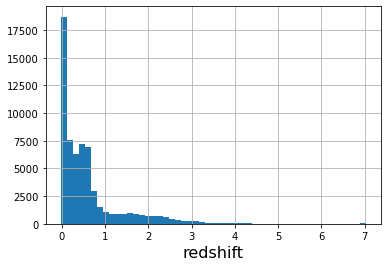

In [9]:
Galaxy_data.z.hist(bins=51)
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

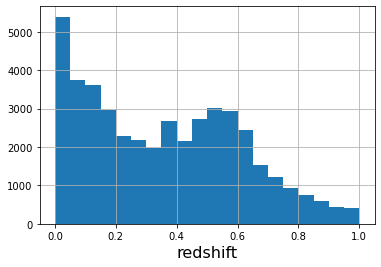

In [10]:
Galaxy_data.z.hist(bins=np.linspace(0.,1.,21))
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'redshift')

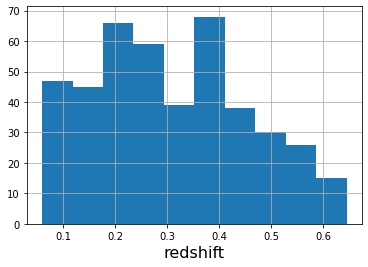

In [11]:
Cluster_data.Z_LAMBDA.hist()
plt.xlabel('redshift',fontsize=16)

Text(0.5, 0, 'v_los')

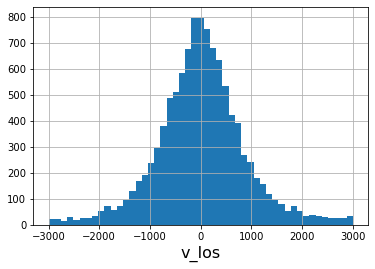

In [12]:
Galaxy_data.v_los.hist(bins=np.linspace(-3000.,3000.))
plt.xlabel('v_los',fontsize=16)

Distance from the Center
---------------------------------------

To have the phase space we need first to compute the distance from the center, $R/R_{200}$.

In [13]:
def aperture_match(ra_cluster,dec_cluster,ra_galaxy,dec_galaxy,r_aper=1/60):
    '''
    Get circles with rmax (Mpc) around each cluster position

    Parameters
    ----------
    ra : float, array
    cluster and galaxy, right ascension of the object in degrees.
    dec : float, array
    cluster and galaxy, declination of the object in degrees.
    ang_diam_dist: array
    angular distance in Mpc
    rmax : float
    aperture radius in Mpc

    Returns
    -------
    indicies_into_galaxies_in_aperture : array
    indices for the galaxies in the circles
    indicies_into_clusters : array
    indices for the cluster table
    radii: array
    relative distance from the center in Mpc
    '''
    import esutil 
    depth=10
    h=esutil.htm.HTM(depth)
    #Inner match
    m1i,m2i,disti=h.match(ra_cluster,dec_cluster,ra_galaxy,dec_galaxy,radius=r_aper,maxmatch=0)

    indicies_into_galaxies_in_aperture=[]
    indicies_into_clusters=[]
    for i in range(len(ra_cluster)):
        w_i=np.where(m1i==i)
        indicies_into_galaxies_in_aperture_i=m2i[w_i]
        indicies_into_galaxies_in_aperture.append(indicies_into_galaxies_in_aperture_i)
        indicies_into_clusters_i = m1i[w_i]
        indicies_into_clusters.append(indicies_into_clusters_i)

    indicies_into_galaxies_in_aperture=np.concatenate(indicies_into_galaxies_in_aperture)
    indicies_into_clusters=np.concatenate(indicies_into_clusters)

    #radii = np.array( disti*(np.pi/180)*ang_diam_dist[indicies_into_clusters] )

    return indicies_into_galaxies_in_aperture, indicies_into_clusters, disti


In [14]:
ra_cluster    = Cluster_data.RA.to_numpy()
dec_cluster   = Cluster_data.DEC.to_numpy()

ra_galaxy     = Galaxy_data.ra.to_numpy()
dec_galaxy    = Galaxy_data.dec.to_numpy()

rmax          = Cluster_data.R200C_DEG.to_numpy()
id0,id1,radii = aperture_match(ra_cluster,dec_cluster,ra_galaxy,dec_galaxy,r_aper=2.2*rmax)

In [44]:
rnorm = radii/rmax[id1]
zcls  = Cluster_data.Z_LAMBDA.to_numpy()[id1]

In [16]:
vlos = Galaxy_data.v_los.to_numpy()[id0]
cut  = np.abs(vlos)<1500.

In [17]:
rlabel=r'$R/R_{200}$'

Text(0, 0.5, 'N')

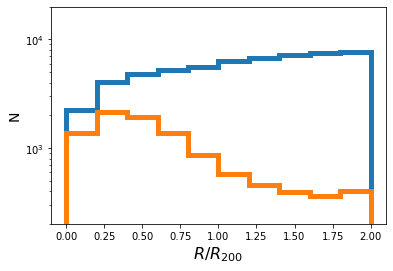

In [18]:
rbins = np.linspace(0.,2.,11)
area  = np.pi*(rbins[1:]**2-rbins[:-1]**2)

_  = plt.hist(rnorm,bins=rbins[:],histtype='step',lw=5)
_  = plt.hist(rnorm[cut],bins=rbins[:],histtype='step',lw=5)
plt.yscale('log')
plt.ylim(2e2,2e4)
plt.xlabel(rlabel,fontsize=16)
plt.ylabel(r'N',fontsize=14)

Text(0, 0.5, '$v_{los}$ [km/s]')

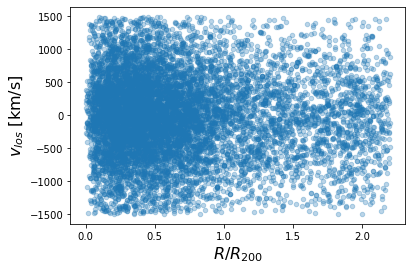

In [19]:
# def plot_phase_space():
plt.scatter(rnorm[cut],vlos[cut],alpha=0.3,s=20)
plt.xlabel(r'$R/R_{200}$',fontsize=16)
plt.ylabel(r'$v_{los}$ [km/s]',fontsize=16)

In [20]:
import seaborn as sns
sns.set_context('notebook')

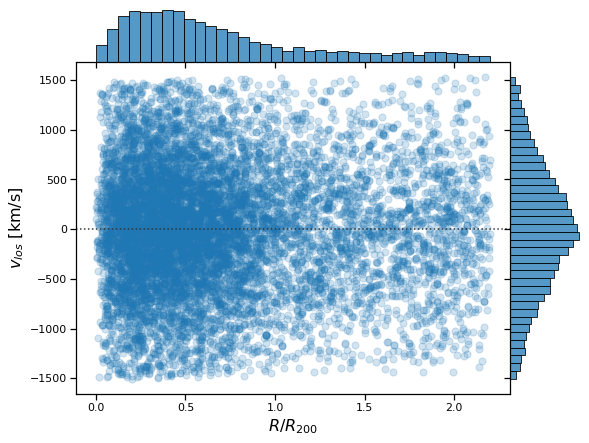

In [21]:
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="scatter", s=10, alpha=0.3, space=0)
# ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)},ylim=(-1650,1650))
ax = sns.jointplot(x=rnorm[cut], y=vlos[cut], kind="resid", space=0, height=6, ratio=6, joint_kws = {'scatter_kws':dict(alpha=0.2,s=50)})
ax.set_axis_labels(r'$R/R_{200}$', r'$v_{los}$ [km/s]', fontsize=16)
ax.fig.set_figwidth(8)



Statstistics 
---------------------------------------

Let's compute the number of galaxies per cluster and check the magnitude completeness of the sample.

In [58]:
mag = Galaxy_data.cModelMag_r.to_numpy()[id0]

In [59]:
ddec= (dec_galaxy[id0]-dec_cluster[id1])/rmax[id1]
dra = (ra_galaxy[id0]-ra_cluster[id1])*np.cos(dec_galaxy[id0]* np.pi / 180. )/rmax[id1]

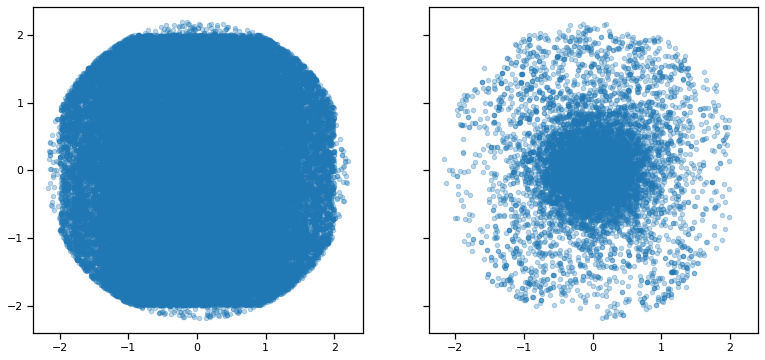

In [60]:
fig, axis = plt.subplots(1, 2, figsize=(13,6), sharex='all',sharey='all')

axis[0].scatter(dra[::1],ddec[::1],s=20,alpha=0.3)
axis[1].scatter(dra[cut][::1],ddec[cut][::1],s=20,alpha=0.3)

In [61]:
#ax = sns.jointplot(x=dra, y=ddec, kind="kde", space=0)

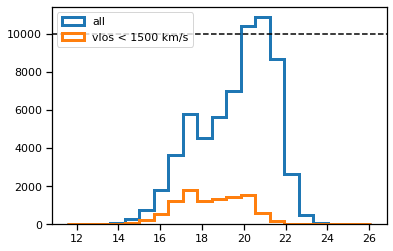

In [62]:
a = plt.hist(mag,bins=21,histtype='step',lw=3,label='all')
_ = plt.hist(mag[cut],bins=a[1],histtype='step',lw=3,label='vlos < 1500 km/s')
plt.axhline(1e4,color='k',ls='--')
# plt.yscale('log')
plt.legend(loc=2)
# plt.ylim(0.5,2e5)

In [98]:
def make_bins(x,xbins):
    indices = []
    xmd     = 0.5*(xbins[1:]+xbins[:-1])
    for xl,xh in zip(xbins[:-1],xbins[1:]):
        w, = np.where((x<=xh)&(x>xl))
        indices.append(w)
    return indices,xmd

In [120]:
#zbins = np.percentile(Cluster_data.Z_LAMBDA.to_numpy(),np.linspace(0,100,6))
zbins = np.percentile(zcls[cut],np.linspace(0,100,5))
keys, zmed = make_bins(zcls,zbins)

zlabel = ['%.3f < z < %.3f'%(zl,zh) for zl,zh in zip(zbins[:-1],zbins[1:])]

In [121]:
zbins

array([0.06017453, 0.10454325, 0.18984814, 0.33575752, 0.64430189])

In [122]:
keys

[array([ 1112,  1113,  1114, ..., 62502, 62503, 62504]),
 array([    0,     1,     2, ..., 62041, 62042, 62043]),
 array([  274,   275,   276, ..., 61924, 61925, 61926]),
 array([  565,   566,   567, ..., 62697, 62698, 62699])]

In [123]:
mag

array([18.00145, 21.12879, 17.12869, ..., 21.94861, 19.88644, 19.88644])

Text(0.5, 1.0, 'SPIDER: all galaxies in the fov')

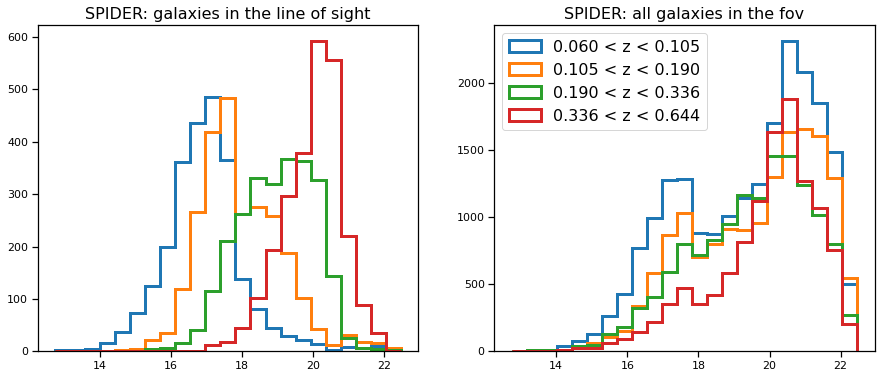

In [134]:
fig, axis = plt.subplots(1, 2, figsize=(15,6), sharex='all')

a = np.histogram(mag[cut],bins=31)

for i,ix in enumerate(keys):
    _ = axis[0].hist(mag[ix[cut[ix]]] ,bins=a[1][:24],histtype='step',lw=3,label=zlabel[i])
    _ = axis[1].hist(mag[ix] ,bins=a[1][:24],histtype='step',lw=3,label=zlabel[i])
    
# plt.axhline(1e4,color='k',ls='--')
# plt.yscale('log')
plt.legend(fontsize=16,loc=2)
# plt.ylim(0.5,2e5)
axis[0].set_title('SPIDER: galaxies in the line of sight',fontsize=16)
axis[1].set_title('SPIDER: all galaxies in the fov',fontsize=16)

In [27]:
ncls = Cluster_data.RA.size
ntot = mag.size
ncut = np.count_nonzero(cut)
print('Number of Galaxies')
print('all: %i'%ntot)
print('cut: %i'%ncut)
print()

Number of Galaxies
all: 62700
cut: 10212



In [28]:
print('Number of clusters: %i \n'%ncls)
print('Number of galaxies per cluster')
print('all: %.2f'%(ntot/ncls))
print('cut: %.2f'%(ncut/ncls))

Number of clusters: 433 

Number of galaxies per cluster
all: 144.80
cut: 23.58



Query: SDSS Dataset
---------------------------------------

Here we want to add information to the galaxy sample. Basically we need the galaxy distance from the cluster center, $R$, and the star formation rate, $SFR$.

Example query:

----------------------------------------------
    -- This query demonstrates the use of a LEFT OUTER JOIN to include rows from the joined table
    -- that do not satisfy the JOIN condition. The OUTER JOIN (LEFT or RIGHT)
    -- is an inclusive JOIN, whereas the INNER (default) JOIN is an exclusive JOIN.
    -- In this case the query returns galaxies with or without spectra that meet the criteria
    -- in the WHERE clause. The ISNULL operator is used to replace null
    -- values with zeros for galaxies without spectra.

----------------------------------------------
    SELECT TOP 10 p.objid, p.ra, p.dec, ISNULL(s.specobjid,0) AS specobjid, ISNULL(s.z, 0) AS z
    FROM Galaxy AS p
    LEFT OUTER JOIN SpecObj s ON s.bestObjID = p.objID
    WHERE
    p.u BETWEEN 0 AND 19.6 AND p.g BETWEEN 0 AND 20


In [29]:
#!conda install -c conda-forge astroquery

In [30]:
from astropy.table import Table,vstack

In [31]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
import astropy.units as u

## Example
rac,dec= Cluster_data['RA'][0],Cluster_data['DEC'][0]
pos = coords.SkyCoord(rac,dec, frame='icrs', unit='deg')

r   = 2*Cluster_data.R200C_DEG[0]*u.deg
xid = SDSS.query_region(pos, radius=r, spectro=True)

/usr/local/anaconda/lib/python3.8/site-packages/astroquery/sdss/core.py:862: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [32]:
columns = SDSS.query_region(pos,field_help=True)

In [33]:
columns.keys()

dict_keys(['photoobj_all', 'specobj_all'])

In [34]:
list(columns['photoobj_all'])

['objID',
 'skyVersion',
 'run',
 'rerun',
 'camcol',
 'field',
 'obj',
 'mode',
 'nChild',
 'type',
 'clean',
 'probPSF',
 'insideMask',
 'flags',
 'rowc',
 'rowcErr',
 'colc',
 'colcErr',
 'rowv',
 'rowvErr',
 'colv',
 'colvErr',
 'rowc_u',
 'rowc_g',
 'rowc_r',
 'rowc_i',
 'rowc_z',
 'rowcErr_u',
 'rowcErr_g',
 'rowcErr_r',
 'rowcErr_i',
 'rowcErr_z',
 'colc_u',
 'colc_g',
 'colc_r',
 'colc_i',
 'colc_z',
 'colcErr_u',
 'colcErr_g',
 'colcErr_r',
 'colcErr_i',
 'colcErr_z',
 'sky_u',
 'sky_g',
 'sky_r',
 'sky_i',
 'sky_z',
 'skyIvar_u',
 'skyIvar_g',
 'skyIvar_r',
 'skyIvar_i',
 'skyIvar_z',
 'psfMag_u',
 'psfMag_g',
 'psfMag_r',
 'psfMag_i',
 'psfMag_z',
 'psfMagErr_u',
 'psfMagErr_g',
 'psfMagErr_r',
 'psfMagErr_i',
 'psfMagErr_z',
 'fiberMag_u',
 'fiberMag_g',
 'fiberMag_r',
 'fiberMag_i',
 'fiberMag_z',
 'fiberMagErr_u',
 'fiberMagErr_g',
 'fiberMagErr_r',
 'fiberMagErr_i',
 'fiberMagErr_z',
 'fiber2Mag_u',
 'fiber2Mag_g',
 'fiber2Mag_r',
 'fiber2Mag_i',
 'fiber2Mag_z',
 'fiber2

In [35]:
list(columns['specobj_all'])

['specObjID',
 'bestObjID',
 'fluxObjID',
 'targetObjID',
 'plateID',
 'sciencePrimary',
 'sdssPrimary',
 'legacyPrimary',
 'seguePrimary',
 'segue1Primary',
 'segue2Primary',
 'bossPrimary',
 'bossSpecObjID',
 'firstRelease',
 'survey',
 'instrument',
 'programname',
 'chunk',
 'platerun',
 'mjd',
 'plate',
 'fiberID',
 'run1d',
 'run2d',
 'tile',
 'designID',
 'legacy_target1',
 'legacy_target2',
 'special_target1',
 'special_target2',
 'segue1_target1',
 'segue1_target2',
 'segue2_target1',
 'segue2_target2',
 'boss_target1',
 'eboss_target0',
 'eboss_target1',
 'eboss_target2',
 'eboss_target_id',
 'ancillary_target1',
 'ancillary_target2',
 'thing_id_targeting',
 'thing_id',
 'primTarget',
 'secTarget',
 'spectrographID',
 'sourceType',
 'targetType',
 'ra',
 'dec',
 'cx',
 'cy',
 'cz',
 'xFocal',
 'yFocal',
 'lambdaEff',
 'blueFiber',
 'zOffset',
 'z',
 'zErr',
 'zWarning',
 'class',
 'subClass',
 'rChi2',
 'DOF',
 'rChi2Diff',
 'z_noqso',
 'zErr_noqso',
 'zWarning_noqso',
 'clas

In [36]:
Galaxy_data[np.in1d(Galaxy_data['specobjid'],xid['specobjid'])]

,ra,dec,specobjid,CLUS_ID,z,zErr,zWarning,v_los,cModelMag_r,cModelMagErr_r,...,flags_g,extinction_g,cModelMag_i,cModelMagErr_i,flags_i,extinction_i,cModelMag_z,cModelMagErr_z,flags_z,extinction_z
0,119.57187,53.638738,2.105547e+18,1_1172,0.136219,0.000035,0,9112.934223,17.23507,0.005641,...,2252074960060432,0.122412,16.78113,0.005188,2252074960195600,0.062929,16.46983,0.011877,2252074960060432,0.046808
1,119.86461,53.630081,2.105555e+18,1_1172,0.084383,0.000012,0,-4979.975610,16.15208,0.003694,...,2252074960191504,0.125668,15.57720,0.003265,288230651298480144,0.064603,15.61078,0.006936,2252074960195600,0.048053
2,119.79602,53.784186,2.105554e+18,1_1172,-0.000519,0.000009,0,-28062.232989,16.17832,0.004368,...,268468224,0.128670,16.15715,0.004446,285245440,0.066146,16.17055,0.007882,268468224,0.049201
3,119.66004,53.700200,2.105547e+18,1_1172,0.068184,0.000009,0,-9383.849868,16.73223,0.004984,...,2252074960060432,0.130808,16.31826,0.004628,2252074960191504,0.067245,16.03879,0.011602,2252074960060432,0.050018
4,119.64952,53.725027,2.105548e+18,1_1172,1.050130,0.000522,0,257579.003441,18.97087,0.012989,...,268468240,0.130222,19.05038,0.013508,268468240,0.066944,19.04692,0.049372,275146375184,0.049794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,119.68401,54.012931,2.105543e+18,1_1172,0.104336,0.000022,0,444.889481,17.17121,0.005671,...,2252074960060432,0.129801,16.82756,0.006108,2252074960060432,0.066728,16.49989,0.013060,2252074960060432,0.049633
270,119.71908,54.019926,2.105544e+18,1_1172,0.101207,0.000020,0,-405.850120,17.56311,0.007197,...,275163152896,0.129726,16.91958,0.007223,275163152896,0.066690,16.62916,0.016645,275297370624,0.049605
271,119.90482,54.172851,2.105558e+18,1_1172,-0.000458,0.000028,0,-28045.690818,17.98277,0.006932,...,276856832,0.114275,18.28871,0.010409,268468224,0.058746,18.62080,0.044731,275146506240,0.043696
272,119.91278,54.340320,2.106645e+18,1_1172,-0.000026,0.000008,0,-27928.228623,16.87777,0.020537,...,18085042401482009,0.119677,14.16375,0.005414,288441757264154649,0.061523,14.67629,0.019938,9218580635090969,0.045762


In [37]:
def query_galaxy_sample(cluster):
    rac,dec= cluster['RA'],cluster['DEC']
    radii  = 2*cluster.R200C_DEG
    cid    = cluster.CLUS_ID
    
    data    = []
    for i in range(len(cluster)):
        print('Cluster ID: %s'%(cid[i]))
        
        pos = coords.SkyCoord(rac[i],dec[i], frame='icrs', unit='deg')
        r   = 2*radii[i]*u.deg
        xid = SDSS.query_region(pos, radius=r, spectro=True)
        data.append(xid)
        print('nobj : %i'%(len(xid)))
        print('\n')
        
    return vstack(data)

In [38]:
#new_galaxy = query_galaxy_sample(Cluster_data[:5])

In [39]:
#new_galaxy

In [40]:
#Galaxy_data[np.in1d(Galaxy_data['specobjid'],new_galaxy['specobjid'])]

Color Analysis
---------------------------------------

First step investigating the color distribution

In [41]:
import sys
import os
sys.path.append(os.path.abspath("/home/johnny/Documents/2ndPhase/ccopa_mag/bma/"))
import gaussianKDE as kde
from colorModeling import *

ModuleNotFoundError: No module named 'gaussianKDE'

In [ ]:
cat = Table.from_pandas(Cluster_data.iloc[np.unique(id1)])
cat['CID'] = np.unique(id1)
cat.rename_column('Z_LAMBDA','redshift')

In [ ]:
gal        = Table.from_pandas(Galaxy_data.iloc[id0])
gal['CID'] = id1

In [ ]:
gal['redshift'] = np.array(cat['redshift'][id1])
gal['Rnorm']    = radii/rmax[id1]
gal['cut']      = cut

In [ ]:
z_cls       = np.array(cat['redshift'])
ids_cls     = cat['CID']
ids_cls_gal = gal['CID']

In [ ]:
gal['mag']    = np.array([gal['cModelMag_%s'%li] for li in ['g','r','i','z']]).T
gal['magerr'] = np.array([gal['cModelMagErr_%s'%li] for li in ['g','r','i','z']]).T

In [ ]:
### defining color variables
color_list = ['gr','ri','iz']
ecolor_list = [ci+'_err' for ci in color_list]

color_value = [(0,1),(1,2),(2,3)]
mag_list = [1,2,3]
gal = set_color_variables(gal,color_list,ecolor_list,color_value)

In [ ]:
gal['Pmem'] = np.ones_like(gal['z'])

In [ ]:
cutr = cut&(gal['Rnorm']<=1.)
indicies_unique = list(chunks(ids_cls_gal[cutr],ids_cls))         ## per cluster

In [ ]:
print('Gaussian Mixture Modeling')
gmm_parameters = computeGMM_AllColors(gal[cutr],z_cls,ids_cls,indicies_unique,color_list=color_list,filter=True)

In [ ]:
def chunks(ids1, ids2):
    """Yield successive n-sized chunks from data"""
    for id in ids2:
        w, = np.where( ids1==id )
        yield w
    pass

def fitPoly(x,y,x_new,norder=3):
    z = np.polyfit(x, y, norder)
    zp = np.poly1d(z)
    y_new = zp(x_new)
    
    y_new = np.where(y_new<0.,0.,y_new)
    return y_new

def makeBins(variable,xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

def get_RS_flag(gal,gmm_parameters,nsigma=2,color_list=['g-r']):
    zcls = gal['z']
    z = gmm_parameters['redshift']
    
    gal['rs_flag'] = np.zeros_like(gal['mag'][:,1:],dtype=int)
    vec = np.zeros_like(gal['mag'][:,1:],dtype=int)
    
    gal['dcolor'] = np.zeros_like(gal['mag'][:,1:],dtype=float)
    
    pmem = gal["Pmem"]
    for j,li in enumerate(color_list):
        color = gal[li]
        
        zrs = gmm_parameters['redshift']
        mur = gmm_parameters['rs_param_%s'%(li)][:,0]
        sigr = gmm_parameters['rs_param_%s'%(li)][:,1]
        
        mur2 = fitPoly(zrs,mur,zrs)
        sigr2 = fitPoly(zrs,sigr,zrs)
        
        w, = np.where(sigr<1e-2)
        sigr[w] = sigr2[w]
        
        w, = np.where(np.abs(mur-mur2)>2*sigr)
        sigr[w] = sigr2[w]
        
        cb_upper = mur+nsigma*sigr
        cb_lower = mur-nsigma*sigr
        
        indices = list(chunks(gal['CID'], gmm_parameters['CID']))
        for i,idx in enumerate(indices):
            gal['rs_flag'][idx,j] = np.where((color[idx]<=cb_upper[i])&(color[idx]>=cb_lower[i]),int(1),int(0))
            vec[idx,j] = np.where((color[idx]>=cb_upper[i]),1,0)
            gal['dcolor'][idx,j] = color[idx]-mur[i]
        
        gal['rs_bad'] = np.sum(vec,axis=1)
        gal['red_score'] = np.sum(gal["rs_flag"],axis=1)
    return gal

In [ ]:
color_list = ['gr','ri','iz']
color_label= [r'(%s-%s)'%(li[0],li[1]) for li in color_list]
z_label = 'redshift'

zbins = np.arange(0.05,0.65,0.05)
print("# color label:")
print(color_label)

In [ ]:
def set_new_col(gal,columns,val=0):
    for col in columns:
        gal[col] = val
    return gal

## get red sequence flag for all colors in color_list
nsigma=3
gal = get_RS_flag(gal,gmm_parameters,nsigma=nsigma,color_list=color_list)

In [ ]:
## Color Model: GMM

In [ ]:
from scipy import interpolate
import scipy.stats as st
from scipy.interpolate import interp1d

def interpData(x,y,x_new):
    out = interp1d(x, y, kind='cubic', fill_value='extrapolate')
    return out(x_new)

def interpDataBinned(x,y,x_edges,x_new):
    keys,x_bin = makeBins(x,x_edges)
    y_bin = np.array([ np.nanmedian(y[idx]) for idx in keys])
    y_new = interpData(x_bin,y_bin,x_new)    
    return y_new

def get_color_model(gmm,zbins):
    """ It gets the mean of the GMM parameters
    """
    gmm_new = gmm.copy()
    zcls=np.array(gmm['redshift'])
    
    for cl in color_list:
        gmm_rs = np.array(gmm['rs_param_%s'%cl][:,0])
        gmm_bc = np.array(gmm['bc_param_%s'%cl][:,0])
        
        gmm_rs_sig = np.array(gmm['rs_param_%s'%cl][:,1])
        gmm_bc_sig = np.array(gmm['bc_param_%s'%cl][:,1])
        
        gmm_rs_alp = gmm['rs_param_%s'%cl][:,2]
        gmm_bc_alp = gmm['bc_param_%s'%cl][:,2]
        
        gmm_rs_new = interpDataBinned(zcls,gmm_rs,zbins,zcls)
        gmm_bc_new = interpDataBinned(zcls,gmm_bc,zbins,zcls)
        
        gmm_rs_sig_new = fitPoly(zcls,gmm_rs_sig,zcls)
        gmm_bc_sig_new = fitPoly(zcls,gmm_bc_sig,zcls)
        
        gmm_rs_alp_new = fitPoly(zcls,gmm_rs_alp,zcls)
        gmm_bc_alp_new = fitPoly(zcls,gmm_bc_alp,zcls)
        
        
        gmm_new['rs_param_%s'%cl][:,0] = gmm_rs_new
        gmm_new['bc_param_%s'%cl][:,0] = gmm_bc_new
        
        gmm_new['rs_param_%s'%cl][:,1] = gmm_rs_sig_new
        gmm_new['bc_param_%s'%cl][:,1] = gmm_bc_sig_new
        
        gmm_new['rs_param_%s'%cl][:,2] = gmm_rs_alp_new
        gmm_new['bc_param_%s'%cl][:,2] = gmm_bc_alp_new
        
    return gmm_new

In [ ]:
gmm = gmm_parameters

In [ ]:
zcls = gmm_parameters['redshift']
zbins = np.arange(0.05,0.7,0.05)

## get a new GMM model
gmm_new = get_color_model(gmm,zbins)

print("redshift bins: width=0.075")
print(zbins)

In [ ]:
## Mean Color
from aux_functions import validating_color_model_grid

validating_color_model_grid(gmm,gmm_new,color_list,lcolor=color_label)
plt.xlim(0.,0.6)
plt.suptitle("Mean Color",fontsize=24)
plt.savefig("gmm_color_model_mean_color.png",bb_box="tight")

In [ ]:
## Width
mask = (gmm['bc_param_gr'][:,1]>0.)&(gmm['bc_param_ri'][:,1]>0.)&(gmm['bc_param_iz'][:,1]>0.)
validating_color_model_grid(gmm[mask],gmm_new,color_list,lcolor=color_label,sigma=True)
plt.suptitle("Width",fontsize=24)
plt.savefig("gmm_color_model_width_color.png",bb_box="tight")

In [ ]:
## Weights
mask = (gmm['bc_param_gr'][:,1]>0.)&(gmm['bc_param_ri'][:,1]>0.)&(gmm['bc_param_iz'][:,1]>0.)
validating_color_model_grid(gmm[mask],gmm_new,color_list,lcolor=color_label,fraction=True)
plt.suptitle("Weights",fontsize=24)
plt.savefig("gmm_color_model_wights_color.png",bb_box="tight")

In [ ]:
def set_new_col(gal,columns,val=0):
    for col in columns:
        gal[col] = val
    return gal

## get red sequence flag for all colors in color_list
nsigma=2
gal = get_RS_flag(gal,gmm_new,nsigma=nsigma,color_list=color_list)

In [ ]:
def print_red_fractions(g):
    ntotal = len(g['CID'])
    print("# red sequence fraction")
    for i,li in enumerate(color_label):
        nrs = np.sum(g["rs_flag"][:,i])
        print('  %s : %.2f'%(li,nrs/ntotal))
    pass

In [ ]:
w, = np.where(gal['redshift']<0.35)
print("galaxies with z<0.35")
print_red_fractions(gal[w])

In [ ]:
w, = np.where((gal['redshift']>0.35)&(gal['redshift']<0.65))
print("galaxies with 0.35< z < 0.65")
print_red_fractions(gal[w])

In [ ]:
def plot_rs_fraction(gal):
    zgal=gal["redshift"]
    keys,zmeans = makeBins(zgal,zbins)
    rs_frac = np.array([np.sum(gal['rs_flag'][idx],axis=0)/len(idx) for idx in keys])
    
    #rs_score = compute_red_score(gal)#np.where(np.sum(gal["rs_flag"],axis=1)>=3,1,0)
    #rs_frac_score = np.array([np.sum(rs_score[idx])/len(idx) for idx in keys])
    
    plt.figure(figsize=(8,6))
    for i,li in enumerate(color_label):
        plt.plot(zmeans,rs_frac[:,i])
        plt.scatter(zmeans,rs_frac[:,i],label=li)
    
    #plt.plot(zmeans,rs_frac_score,color='k')
    #plt.scatter(zmeans,rs_frac_score,color='k',label='RS selection')

    plt.axvline(0.35,color='gray',linestyle='--')
#     plt.axvline(0.7,color='gray',linestyle='--')

    plt.ylabel(r'$f_{RS}$',fontsize=24)
    plt.xlabel(z_label)
#     plt.ylim(0.35,1.)
    plt.legend()

In [ ]:

# ## 4000 Ang break
# ## 0.35, 0.69, 1.06 - g, r, i bands
# w1, = np.where(zrs<=0.35)
# w2, = np.where((zrs<=0.35)&(zrs<=0.69))
# w3, = np.where((zrs<=0.69)&(zrs<=1.06))

# rs_score = np.sum(gal["rs_flag"],axis=1)

In [ ]:
field = vlos>3000.

In [ ]:
plot_rs_fraction(gal[cut])
plot_rs_fraction(gal[field])
#plt.savefig('red_sequence_fraction.png')

In [ ]:
def plot_rs_profile(gal,rbins=np.linspace(0.,2.0,11)):
    radii=gal["Rnorm"]
    keys,rmeans = makeBins(radii,rbins)
    rs_frac = np.array([np.sum(gal['rs_flag'][idx],axis=0)/len(idx) for idx in keys])
    
    #rs_score = compute_red_score(gal)#np.where(np.sum(gal["rs_flag"],axis=1)>=3,1,0)
    #rs_frac_score = np.array([np.sum(rs_score[idx])/len(idx) for idx in keys])
    
    plt.figure(figsize=(8,6))
    for i,li in enumerate(color_label):
        plt.plot(rmeans,rs_frac[:,i])
        plt.scatter(rmeans,rs_frac[:,i],label=li)
    
    #plt.plot(zmeans,rs_frac_score,color='k')
    #plt.scatter(zmeans,rs_frac_score,color='k',label='RS selection')

#     plt.axvline(0.35,color='gray',linestyle='--')
#     plt.axvline(0.7,color='gray',linestyle='--')

    plt.ylabel(r'$f_{RS}$',fontsize=24)
    plt.xlabel(rlabel,fontsize=20)
#     plt.ylim(0.35,1.)
    plt.legend()

In [ ]:
cut2 = cut&(gal['redshift']<0.65)

In [ ]:
plot_rs_profile(gal[cut2])
plot_rs_profile(gal[field])

In [ ]:
rs_flag = gal['rs_flag'][:,0]

In [ ]:
# def plot_phase_space():
plt.scatter(rnorm[cut2][::5],vlos[cut2][::5],c=rs_flag[cut2][::5],alpha=0.3,s=20,cmap='jet')
plt.xlabel(r'$R/R_{200}$',fontsize=16)
plt.ylabel(r'$v_{los}$ [km/s]',fontsize=16)